In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
spend = pd.read_csv("spend_analysis_dataset.csv")

In [11]:
spend

,TransactionID,ItemName,Category,Quantity,UnitPrice,TotalCost,PurchaseDate,Supplier,Buyer
0,TXN001,Desk Chair,Furniture,10,113.15,1131.50,2024-04-19,TechMart Inc.,Kelly Joseph
1,TXN002,Stapler,Office Supplies,16,12.62,201.92,2024-07-06,CloudSoft Corp.,Kelly Joseph
2,TXN003,Annual Software License,Software,1,5649.34,5649.34,2024-09-10,TechMart Inc.,Kelly Joseph
3,TXN004,Notepad,Stationery,13,2.92,37.96,2024-01-21,FurniWorks Ltd.,Luis Holland
4,TXN005,Notepad,Stationery,19,1.39,26.41,2024-02-03,TechMart Inc.,Cynthia Jenkins
...,...,...,...,...,...,...,...,...,...
495,TXN496,Whiteboard,Furniture,19,104.12,1978.28,2024-08-20,QuickDeliver Ltd.,Noah Long
496,TXN497,Laptop,Electronics,5,919.08,4595.40,2024-08-15,OfficeSupplies Co.,Walter Pena
497,TXN498,Notepad,Stationery,3,1.51,4.53,2024-05-12,QuickDeliver Ltd.,Jessica Hodges
498,TXN499,Whiteboard,Furniture,17,162.01,2754.17,2024-03-14,FurniWorks Ltd.,Rebecca Bell


In [13]:
spend.set_index("TransactionID",inplace=True)

In [15]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, TXN001 to TXN500
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ItemName      500 non-null    object 
 1   Category      500 non-null    object 
 2   Quantity      500 non-null    int64  
 3   UnitPrice     500 non-null    float64
 4   TotalCost     500 non-null    float64
 5   PurchaseDate  500 non-null    object 
 6   Supplier      500 non-null    object 
 7   Buyer         500 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 35.2+ KB


In [17]:
spend.groupby("Category")["TotalCost"].agg(['mean','max','min'])

,mean,max,min
Category,,,
Accessories,372.450714,909.00,20.72
Electronics,4779.487877,18494.60,214.63
Furniture,1694.300098,3780.05,138.95
Office Supplies,105.471167,241.49,8.77
Software,7304.739130,9909.24,5047.01
Stationery,75.035333,348.65,1.56


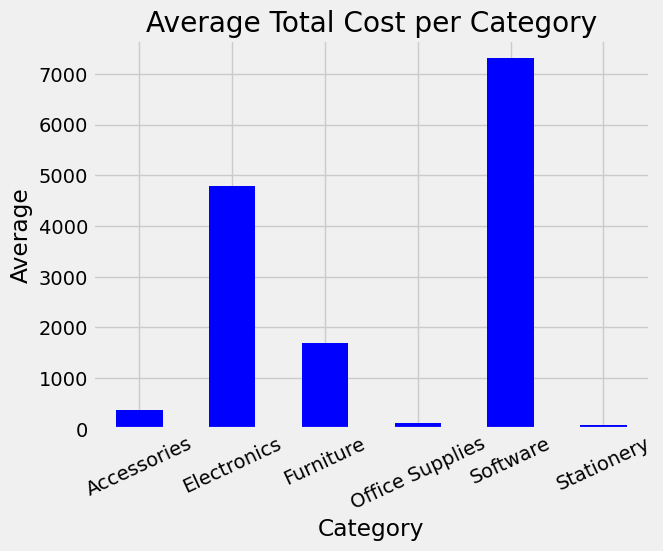

In [23]:
spend.groupby("Category")["TotalCost"].mean().plot(kind='bar',title="Average Total Cost per Category", color="blue")
plt.xlabel('Category')
plt.ylabel('Average')
plt.xticks(rotation=25)
plt.grid(visible=True)
plt.style.use('fivethirtyeight')

Text(0.5, 1.0, 'Chart Showing Category Quantity')

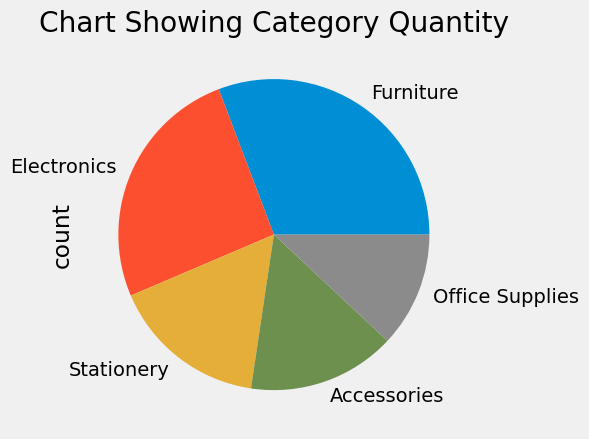

In [25]:
spend[spend["Quantity"] > 15]["Category"].value_counts().plot(kind='pie')
plt.title("Chart Showing Category Quantity")

In [27]:
spend.describe()

,Quantity,UnitPrice,TotalCost
count,500.000000,500.000000,500.00000
mean,9.640000,854.245100,2481.16106
std,6.168834,2132.890832,3527.35316
min,1.000000,1.060000,1.56000
25%,4.000000,14.380000,145.92750
50%,10.000000,143.595000,918.56000
75%,15.000000,287.925000,3123.56750
max,20.000000,9909.240000,18494.60000


In [29]:
spend.groupby("Category")["UnitPrice"].sum()

Category
Accessories          1799.33
Electronics         72851.52
Furniture           15101.38
Office Supplies       616.55
Software           336018.00
Stationery            735.77
Name: UnitPrice, dtype: float64

Text(0.5, 1.0, 'Total Unit Price of Products')

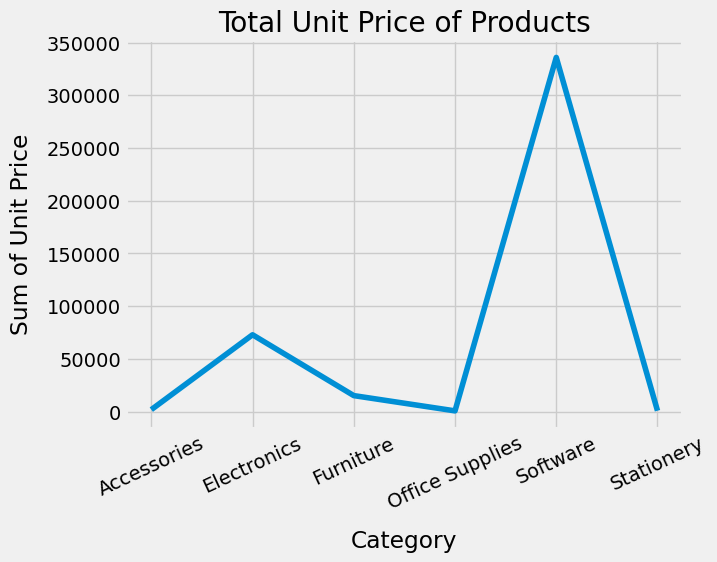

In [31]:
spend.groupby("Category")["UnitPrice"].sum().plot(kind='line')
plt.ylabel("Sum of Unit Price",labelpad=10)
plt.xlabel("Category", labelpad=12)
plt.xticks(rotation=25)
plt.title("Total Unit Price of Products")

In [33]:
spend[(spend["ItemName"] =='Laptop') & (spend["TotalCost"]>10000)]

,ItemName,Category,Quantity,UnitPrice,TotalCost,PurchaseDate,Supplier,Buyer
TransactionID,,,,,,,,
TXN019,Laptop,Electronics,19,815.19,15488.61,2024-10-22,TechMart Inc.,Jasmine Mcgee
TXN031,Laptop,Electronics,16,980.67,15690.72,2024-05-13,QuickDeliver Ltd.,Luis Holland
TXN045,Laptop,Electronics,12,835.25,10023.00,2024-08-05,QuickDeliver Ltd.,Laura White
TXN054,Laptop,Electronics,14,812.03,11368.42,2024-01-01,QuickDeliver Ltd.,Laura White
TXN061,Laptop,Electronics,20,920.32,18406.40,2024-11-17,TechMart Inc.,Dawn Padilla
TXN134,Laptop,Electronics,17,830.68,14121.56,2024-04-21,OfficeSupplies Co.,Todd James
TXN137,Laptop,Electronics,13,825.83,10735.79,2024-03-14,CloudSoft Corp.,Rebecca Bell
TXN210,Laptop,Electronics,14,838.27,11735.78,2024-01-05,CloudSoft Corp.,Cynthia Jenkins
TXN252,Laptop,Electronics,11,960.70,10567.70,2024-10-22,TechMart Inc.,Todd James


In [35]:
spend.loc[['TXN100','TXN225','TXN304']]

,ItemName,Category,Quantity,UnitPrice,TotalCost,PurchaseDate,Supplier,Buyer
TransactionID,,,,,,,,
TXN100,Laptop Bag,Accessories,10,20.40,204.00,2024-11-23,QuickDeliver Ltd.,Jasmine Mcgee
TXN225,Stapler,Office Supplies,17,12.26,208.42,2024-03-24,CloudSoft Corp.,Lisa Parks
TXN304,Monitor,Electronics,11,278.12,3059.32,2024-12-30,CloudSoft Corp.,Nicole Clay


In [37]:
spend.groupby("Buyer")["TotalCost"].sum().head(10)

Buyer
Aaron Hopkins      75865.04
Amy Warner         51743.36
Barry Johnson      68937.27
Cynthia Jenkins    52345.08
Dawn Padilla       76908.12
Jasmine Mcgee      94185.73
Jessica Hodges     50654.67
Kayla Hanson       69848.40
Kelly Joseph       76434.12
Kevin Adams        13476.78
Name: TotalCost, dtype: float64

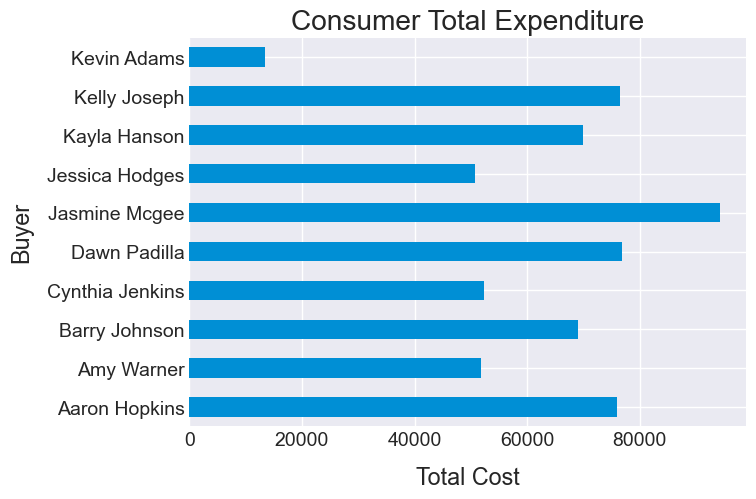

In [41]:
spend.groupby("Buyer")["TotalCost"].sum().head(10).plot(kind='barh')
plt.xlabel("Total Cost",labelpad=12)
plt.ylabel("Buyer",labelpad=10)
plt.title("Consumer Total Expenditure")
plt.style.use('seaborn-v0_8-darkgrid')

In [67]:
def quantity_levels(quantity):
    if quantity > 20:
        return "Highly Purchased"
    elif quantity >= 15:
        return "Affordable To Middleclass"
    elif quantity >= 8:
        return "People Buy It"
    else:
        return "Expensive"
    

In [69]:
spend["Quantity_Levels"] = spend["Quantity"].apply(quantity_levels)

In [75]:
spend["Quantity_Levels"].value_counts()

Quantity_Levels
Expensive                    205
People Buy It                155
Affordable To Middleclass    140
Name: count, dtype: int64

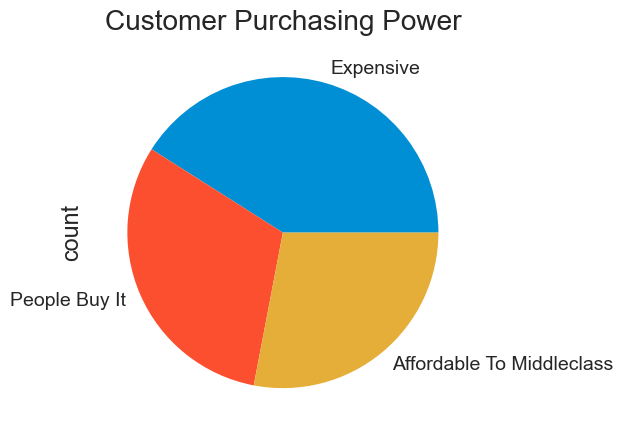

In [91]:
spend["Quantity_Levels"].value_counts().plot(kind='pie')
plt.title("Customer Purchasing Power")
plt.show()

In [113]:
spend[spend["Quantity_Levels"] =='Expensive']["ItemName"].head(200).value_counts()

ItemName
Annual Software License    46
Laptop                     21
Stapler                    20
Printer                    20
Laptop Bag                 18
Whiteboard                 17
Printer Ink                16
Notepad                    15
Desk Chair                 14
Monitor                    13
Name: count, dtype: int64

<Figure size 1000x800 with 0 Axes>

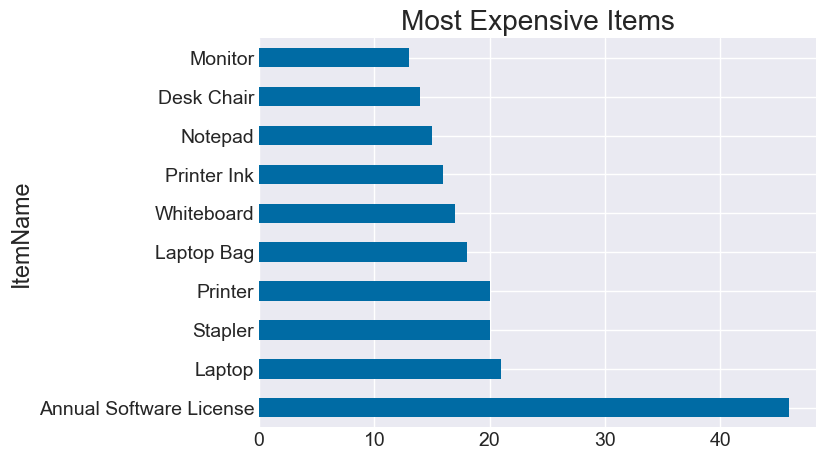

<Figure size 1000x800 with 0 Axes>

In [153]:
spend[spend["Quantity_Levels"] =='Expensive']["ItemName"].head(200).value_counts().plot(kind='barh')
plt.title("Most Expensive Items")
plt.figure(figsize=(10,8))
